<a href="https://colab.research.google.com/github/afrojaakter/AI-practice-problem/blob/main/Region20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

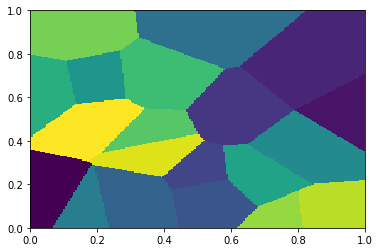

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
M = 200
points = np.random.rand(N,2)

X,Y = np.meshgrid(np.linspace(0,1,M), np.linspace(0,1,M))

Z = np.zeros([M,M])

for i in range (M):
  for j in range (M):
    minDist = 1000000
    minIdx = -1
    for k in range(N):
      x = X[i,j]
      y = Y[i,j]
      d = (x-points[k,0])**2 + (y-points[k,1])**2
      if d < minDist:
        minDist = d
        minIdx = k
      Z[i,j] = minIdx

plt.pcolor(X,Y,Z)
plt.show()

In [ ]:
df_inputs = np.vstack([X.ravel(), Y.ravel()]).T

df_labels = Z.ravel()
df_labels = df_labels.reshape(-1,1)

df_inputs.shape, df_labels.shape

((40000, 2), (40000, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, test_inputs, y_train, test_labels = train_test_split(df_inputs, df_labels, test_size=0.33, random_state=42)

train_inputs, valid_inputs, train_labels, valid_labels = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, Sequential
import os

model = Sequential([
                    layers.Dense(6, activation='relu'),
                    layers.Dense(N, activation = 'softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
epochs = 50
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True, 
                                                 save_weights_only=True,
                                                 verbose=1)
history = model.fit(train_inputs,
           train_labels,
           epochs= epochs,
           batch_size= 32,
           validation_data= (valid_inputs, valid_labels),
           callbacks=[cp_callback])

Epoch 1/50
670/670 [==============================] - 1s 2ms/step - loss: 2.7658 - accuracy: 0.0958 - val_loss: 2.5163 - val_accuracy: 0.1190

Epoch 00001: val_loss improved from inf to 2.51634, saving model to training_1/cp.ckpt
Epoch 2/50
670/670 [==============================] - 1s 1ms/step - loss: 2.3023 - accuracy: 0.2360 - val_loss: 2.0903 - val_accuracy: 0.3924

Epoch 00002: val_loss improved from 2.51634 to 2.09032, saving model to training_1/cp.ckpt
Epoch 3/50
670/670 [==============================] - 1s 1ms/step - loss: 1.9377 - accuracy: 0.4042 - val_loss: 1.7786 - val_accuracy: 0.4438

Epoch 00003: val_loss improved from 2.09032 to 1.77856, saving model to training_1/cp.ckpt
Epoch 4/50
670/670 [==============================] - 1s 1ms/step - loss: 1.6617 - accuracy: 0.4761 - val_loss: 1.5351 - val_accuracy: 0.5241

Epoch 00004: val_loss improved from 1.77856 to 1.53513, saving model to training_1/cp.ckpt
Epoch 5/50
670/670 [==============================] - 1s 1ms/step - 

In [ ]:
#printing the weights and biases of each layer
model.layers[1].get_weights()

[array([[ 3.67016244e+00, -6.27722645e+00, -3.51743507e+00,
         -9.95062113e-01,  1.64490804e-01, -1.57071555e+00,
         -1.78051755e-01, -8.75995219e-01,  1.43342507e+00,
         -3.70478368e+00,  1.74458921e+00, -1.89789021e+00,
          2.25148511e+00,  6.24881744e-01,  9.89607036e-01,
          1.64585578e+00, -5.89856672e+00, -9.76712894e+00,
          7.27118850e-01,  1.81080341e+00],
        [-1.26856985e+01,  1.85672259e+00,  1.85575402e+00,
          1.55830085e-02, -1.02095413e+00, -3.59926724e+00,
         -1.24897718e+01,  1.98190403e+00, -1.92686977e+01,
          1.62861633e+00, -3.61759424e+00,  4.52821940e-01,
         -8.49155807e+00, -7.76997924e-01, -2.75150752e+00,
          4.20285836e-02, -1.50204718e-01,  1.36569881e+00,
         -2.76365137e+00, -3.95682311e+00],
        [-7.46783733e+00, -1.37031043e+00,  9.05084252e-01,
         -7.79256463e-01, -5.02998924e+00, -1.16615477e+01,
         -5.22662401e+00,  2.31711674e+00, -9.07832050e+00,
         -4.

Text(0.5, 1.0, 'training and Validation Loss')

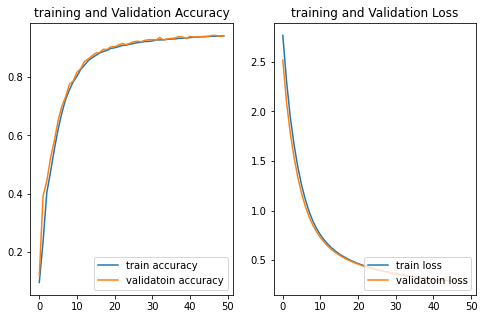

In [ ]:
#plotting loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='train accuracy')
plt.plot(epochs_range, val_acc, label='validatoin accuracy')
plt.legend(loc='lower right')
plt.title('training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='train loss')
plt.plot(epochs_range, val_loss, label='validatoin loss')
plt.legend(loc='lower right')
plt.title('training and Validation Loss')

In [ ]:
# few true test_labels and predicted labels
preds = model.predict(test_inputs)
test_preds = np.array([np.argmax(preds[i]) for i in range(preds.shape[0])])
test_preds[:10], test_labels[:10].T

(array([15,  3, 13,  5, 13,  2, 11,  2,  9, 13]),
 array([[15., 18., 13.,  5., 13.,  2., 11.,  2.,  9., 13.]]))

In [ ]:
count = 0
for i in range(len(test_preds)):
  if test_preds[i] == test_labels[i]:
    count += 1
print("prediction score on test data: {} %".format(round(100*count/len(test_labels),2)))

prediction score on test data: 94.3 %


In [ ]:

X,Y = np.meshgrid(np.linspace(0,1,M), np.linspace(0,1,M))
df = np.vstack([X.ravel(), Y.ravel()]).T

preds = model.predict(df) 
Z_preds = np.array([np.argmax(preds[i]) for i in range(preds.shape[0])])

Z_preds = Z_preds.reshape(M,M)

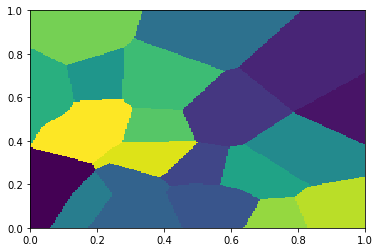

In [ ]:
plt.pcolor(X, Y, Z_preds)
plt.show()

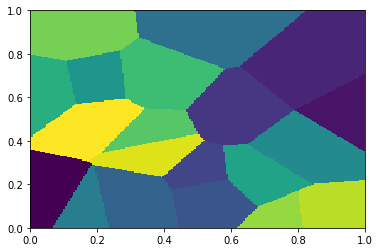

In [ ]:
plt.pcolor(X, Y, Z)
plt.show()